<a href="https://colab.research.google.com/github/ash11sh/fm.PyTorch/blob/master/face_makeup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# git clone

In [0]:
!git clone https://github.com/ash11sh/fm.PyTorch.git

In [0]:
cd fm.PyTorch

In [0]:
!pip install face-alignment

# Imports

In [0]:
import os
import glob
import cv2
import requests
import numpy as np
from PIL import Image
from utils import Preprocess
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from test import evaluate
from google.colab.patches import cv2_imshow
from makeup import exif_remover,resizer,sharpen,hair
from IPython import  display


# color the hair

* you can try this by pasting image url source
* if it is local image then upload it to [pasteboard](https://pasteboard.co/) or [flickr](https://www.flickr.com/) or any other image hosting sites and paste the link here

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


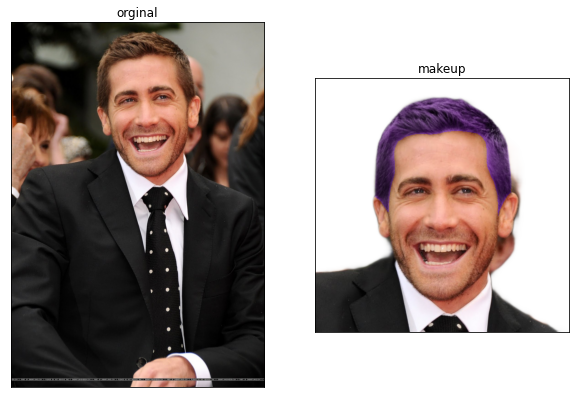

In [5]:

table = {'hair': 17, 'upper_lip': 12, 'lower_lip': 13 }
cp = 'cp/79999_iter.pth'

#@markdown paste your image url  source here
img_url = 'http://3.bp.blogspot.com/_R5WS6_kmmTI/S_MUR6AOk8I/AAAAAAAAuqU/P-ZI-E8g_9g/s1600/056.jpg' #@param {type: "string"} 

filename = img_url.split('/')[-1]
r = requests.get(img_url, allow_redirects=True)
open(filename, 'wb').write(r.content)


img_size = "512"  #@param [512,256]

img  =  cv2 . cvtColor ( cv2.imread (filename), cv2 . COLOR_BGR2RGB )
pre  =  Preprocess ()

# face alignment and segmentation
face_rgba  =  pre . process ( img )
if  face_rgba  is  not  None :
  # change background to white
  face_rgba  =  cv2 . resize ( face_rgba , (int(img_size),int(img_size )), interpolation = cv2 . INTER_AREA )
  face  =  face_rgba [:,:,: 3 ]. copy ()
  mask  =  face_rgba [:,:, 3 ]. copy () [:,:, np . newaxis ] / 255.
  face_white_bg  = ( face * mask  + ( 1 - mask ) * 255 ). astype ( np . uint8 )
  potrait = cv2.cvtColor (face_white_bg , cv2 . COLOR_RGB2BGR )
  cv2.imwrite('potrait.png',potrait)

parsing = evaluate(potrait, cp)
part = [table['hair']]
green = [25,250,32]
yellow = [30,252,249]
orange = [30,108,252]
burgundy = [32,0,128]
ruby =[95,17,224]
blonde = [123,201,227]
DarkRed = [0,0,139]
DarkCyan = [139,139,0]
DarkMagenta = [139,0,139]
Coral = [80,127,255 ]
Violet = [211,0,148]
SeaGreen = [128,205,67]
Peach=[185,218,255]
Gold = [0,215,255]
Chocolate = [19,69,139	]

#@markdown view output in gif mode(loop through available colors)
gif_mode = False #@param {type:"boolean"}


if gif_mode:
  colors = [green,yellow,orange,burgundy,ruby,blonde,DarkRed,DarkCyan,
            DarkMagenta,Coral,Violet,SeaGreen,Peach,Gold,Chocolate]
  for color in colors:
    image = hair(potrait, parsing, part, color)
    cv2.imwrite('haircolor'+str(color)+'.png',image)
    # filepaths
  fp_in = "/content/fm.PyTorch/haircolor*.png"
  fp_out ="image.gif"
  img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
  img.save(fp=fp_out, format='GIF', append_images=imgs,save_all=True, duration=200, loop=0)

  
else:
  #@markdown view only single color
  colors = Violet #@param ['green','yellow','orange','burgundy','ruby','blonde','DarkRed','DarkCyan','DarkMagenta','Coral','Violet','SeaGreen','Peach','Gold','Chocolate'] {type:"raw"}
  image = hair(potrait, parsing, part, colors)
  # cv2.imwrite('makeup.png',image)
  nrows,ncols = 1,2
  fig, axs = plt.subplots(nrows,ncols, figsize=(10,10))
  axs[0].imshow(img)
  axs[0].set_title('orginal')
  axs[0].set_xticks([]), axs[0].set_yticks([])
  axs[1].imshow(cv2.cvtColor (image , cv2 . COLOR_BGR2RGB ))
  axs[1].set_title('makeup')
  axs[1].set_xticks([]), axs[1].set_yticks([])
  plt.show()

if gif_mode:
  with open('image.gif','rb') as f:
    display.display(display.Image(data=f.read(), height=512))
